In [29]:
import pandas as pd
import numpy as np
import pylab

%matplotlib inline


In [30]:
summary = pd.read_csv('data/atussum_2014.dat')
from summary_data import *
summary = summary.rename(columns=all_cols)

#respondents = pd.read_csv('data/atusresp_2014.dat')
#
roster = pd.read_csv('data/atusrost_2014.dat')

In [31]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 11591
Columns: 409 entries, case_id to Unable to code activity at 1st tier
dtypes: float64(1), int64(408)
memory usage: 36.3 MB


In [32]:
summary.head(20)

,case_id,stat_weight,age_youngest_child,age,sex,high_lvl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0
5,20140101140537,3622350.817628,-1,85,1,36,2,2,1,5,...,0,0,0,0,0,0,0,0,0,0
6,20140101140559,3653337.861341,1,27,1,43,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
7,20140101140610,11589604.860274,0,28,1,42,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
8,20140101140614,2019096.316437,-1,63,2,40,1,2,1,1,...,0,0,0,0,0,0,0,0,70,0
9,20140101140639,5332005.152751,-1,85,1,44,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0


In [33]:
len(summary.high_lvl_edu.unique())
summary.high_lvl_edu[39:46].count()

7

In [34]:
schooling = summary[['high_lvl_edu', 'sex']]
schooling.head()

,high_lvl_edu,sex
0,39,2
1,37,2
2,38,2
3,39,2
4,39,2


In [39]:
female=schooling[schooling.sex==1].groupby('high_lvl_edu').count().reset_index()
male=schooling[schooling.sex==2].groupby('high_lvl_edu').count().reset_index()
# female

school_by_sex = pd.merge(male, female, on='high_lvl_edu', how='inner')

In [40]:
school_by_sex.pivot_table#(index='high_lvl_edu', columns='sex' )
# schooling = summary.high_lvl_edu.value_counts()
# schooling.summary(groupby['sex', 'high_lvl_edu'])
# schooling = schooling.high_lvl_edu.replace('31', '30')


<bound method DataFrame.pivot_table of     high_lvl_edu  sex_x  sex_y
0             31      8     11
1             32     42     27
2             33     74     66
3             34    121    115
4             35    131    138
5             36    161    153
6             37    173    178
7             38     65     59
8             39   1630   1263
9             40   1138    880
10            41    290    207
11            42    432    242
12            43   1376   1060
13            44    659    502
14            45     75     94
15            46     93    129>

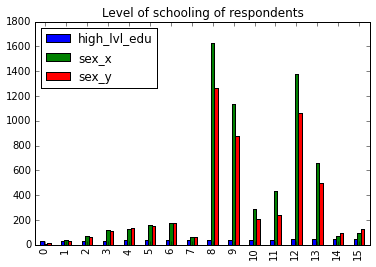

In [44]:
#summary[summary.high_lvl_edu].sort('sex')
#product_count = complaints.Product.value_counts()
school_by_sex.high_lvl_edu.value_counts()
# for summary.high_lvl_edu < 35

school_by_sex.plot(title = 'Level of schooling of respondents', legend = True, kind = 'bar')

In [ ]:
#summary[summary.sex > 0].sort('sex')


In [ ]:
summary[summary.hs_or_col > 0].index


In [ ]:
summary[summary.high_lvl_edu > 38].sort('high_lvl_edu')